In [1]:
#imports
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
#eigvec and eigval in dataframes
eigVec=pd.read_csv('mergedchromosomesPCA.eigenvec', header=None, sep='\s+')
eigVal=pd.read_csv('mergedchromosomesPCA.eigenval', header=None)
eigVec=eigVec.drop(columns=0)
eigVec.columns = ['SampleName','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8', 'PC9','PC10']
eigVec.head()

,SampleName,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,HG00096,-0.008530,-0.026833,0.007752,-0.034843,-0.034096,-0.032451,-0.010023,-0.008262,-0.005986,0.009597
1,HG00097,-0.008683,-0.028703,0.015062,-0.020803,0.004901,0.010627,0.012148,-0.012094,0.003908,0.028440
2,HG00099,-0.010999,-0.024795,0.003476,-0.015461,0.031409,-0.003815,0.000576,0.009293,-0.017273,0.022709
3,HG00100,-0.010732,-0.026956,0.012427,-0.028614,0.011943,-0.000522,0.018069,0.036963,0.023619,0.002856
4,HG00101,-0.010580,-0.023985,0.005761,-0.010232,0.037077,-0.004512,0.008093,0.004278,0.004872,-0.004990


In [5]:
#tsv table to incorporate w/ PCA visualization
igsr = pd.read_csv("igsr_samples.tsv", sep='\t')
igsr = igsr.rename(columns={"Superpopulation code": "SuperpopulationCode"})
igsr

,Sample name,Sex,Biosample ID,Population code,Population name,SuperpopulationCode,Superpopulation name,Population elastic ID,Data collections
0,HG00174,female,SAME124958,FIN,"Finnish,Finnish",EUR,"European Ancestry,West Eurasia (SGDP)","FIN,FinnishSGDP","1000 Genomes on GRCh38,Simons Genome Diversity..."
1,HG00179,female,SAME124965,FIN,Finnish,EUR,European Ancestry,FIN,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,HG00181,male,SAME123644,FIN,Finnish,EUR,European Ancestry,FIN,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,HG00148,male,SAME124388,GBR,British,EUR,European Ancestry,GBR,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,HG00150,female,SAME124591,GBR,British,EUR,European Ancestry,GBR,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
5,HG00155,male,SAME124588,GBR,British,EUR,European Ancestry,GBR,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
6,HG00117,male,SAME125346,GBR,British,EUR,European Ancestry,GBR,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
7,HG00124,female,SAME122870,GBR,British,EUR,European Ancestry,GBR,"1000 Genomes on GRCh38,1000 Genomes phase 3 re..."
8,HG00129,male,SAME122867,GBR,British,EUR,European Ancestry,GBR,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
9,HG00186,male,SAME123647,FIN,Finnish,EUR,European Ancestry,FIN,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [4]:
#map sample name column to eigenvector 
sampleNamesWCode = eigVec.merge(igsr, left_on='SampleName', right_on='Sample name').reindex(columns=['SampleName','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8', 'PC9','PC10','SuperpopulationCode'])
sampleNamesWCode.head()

,SampleName,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,SuperpopulationCode
0,HG00096,-0.008530,-0.026833,0.007752,-0.034843,-0.034096,-0.032451,-0.010023,-0.008262,-0.005986,0.009597,EUR
1,HG00097,-0.008683,-0.028703,0.015062,-0.020803,0.004901,0.010627,0.012148,-0.012094,0.003908,0.028440,EUR
2,HG00099,-0.010999,-0.024795,0.003476,-0.015461,0.031409,-0.003815,0.000576,0.009293,-0.017273,0.022709,EUR
3,HG00100,-0.010732,-0.026956,0.012427,-0.028614,0.011943,-0.000522,0.018069,0.036963,0.023619,0.002856,EUR
4,HG00101,-0.010580,-0.023985,0.005761,-0.010232,0.037077,-0.004512,0.008093,0.004278,0.004872,-0.004990,EUR


In [11]:
#get list of unique population codes
popCodes = igsr.SuperpopulationCode.unique()
populationCategories = np.delete(popCodes, [5])
list(populationCategories)

['EUR', 'EAS', 'AMR', 'SAS', 'AFR']

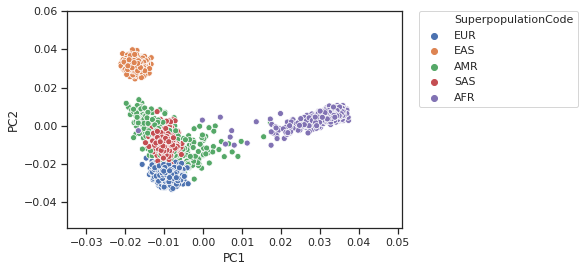

In [23]:
#plot scatterplot of PC1 and PC2 grouped by SuperpopulationCode
seaborn.set(style='ticks')
fg = seaborn.scatterplot(data=sampleNamesWCode, x='PC1', y='PC2', hue='SuperpopulationCode', hue_order=list(populationCategories), legend='full')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)